<a href="https://colab.research.google.com/github/ahmetr99/911DataCallsCapstone/blob/main/01_911_Calls_Data_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 911 Calls Capstone Project

In [56]:
!pip install folium
!pip install branca
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



In [7]:
from google.colab import files
uploaded = files.upload()

TypeError: 'NoneType' object is not subscriptable

In [ ]:
%matplotlib inline

In [8]:
df = pd.read_csv('911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [10]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


In [11]:
df['zip'].value_counts().head()

,count
zip,
19401.0,6979
19464.0,6643
19403.0,4854
19446.0,4748
19406.0,3174


In [12]:
df['twp'].value_counts().head()

,count
twp,
LOWER MERION,8443
ABINGTON,5977
NORRISTOWN,5890
UPPER MERION,5227
CHELTENHAM,4575


In [13]:
df['title'].nunique()

110

In [14]:
Reason = df['title'].apply(lambda x: x.split(':')[0])
df['Reason']= Reason
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [15]:
df['Reason'].value_counts()

,count
Reason,
EMS,48877
Traffic,35695
Fire,14920


<Axes: xlabel='Reason', ylabel='count'>

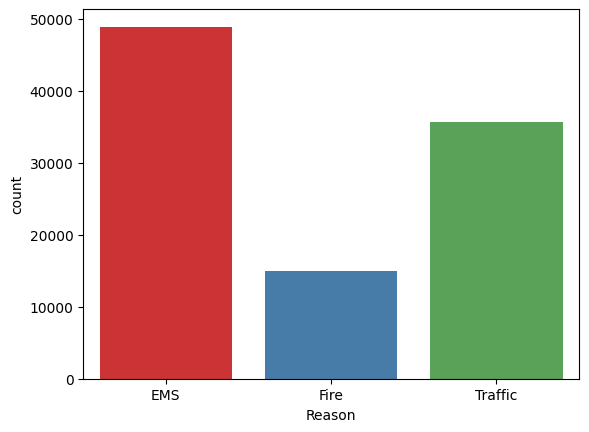

In [16]:
sns.countplot(data=df,x='Reason',hue='Reason',palette='Set1',legend= False)

In [17]:
print(df['timeStamp'].dtype)

object


In [18]:
pd.to_datetime(df['timeStamp'])

,timeStamp
0,2015-12-10 17:40:00
1,2015-12-10 17:40:00
2,2015-12-10 17:40:00
3,2015-12-10 17:40:01
4,2015-12-10 17:40:01
...,...
99487,2016-08-24 11:06:00
99488,2016-08-24 11:07:02
99489,2016-08-24 11:12:00
99490,2016-08-24 11:17:01


In [21]:
time = df['timeStamp'].iloc[0]


In [25]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

df['Hour'] = df['timeStamp'].dt.hour
df['Month'] = df['timeStamp'].dt.month
df['DayOfWeek'] = df['timeStamp'].dt.dayofweek
day_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df['DayName'] = df['DayOfWeek'].map(day_map)
df['Category'] = df['title'].apply(lambda x: x.split(':')[0])

<ipython-input-26-6471ca3eaeed>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df, palette='viridis')


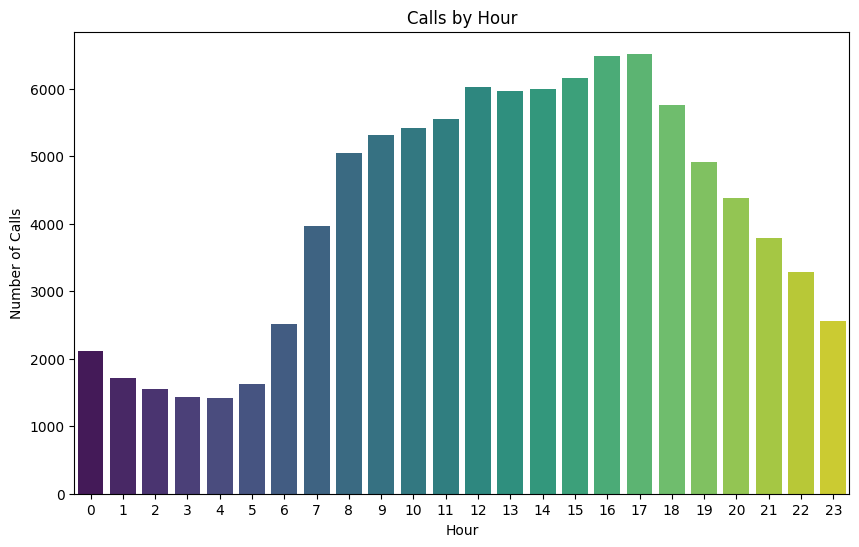

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Hour', data=df, palette='viridis')
plt.title('Calls by Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Calls')
plt.show()

<ipython-input-27-6135ca62e1e9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DayName', data=df, order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], palette='coolwarm')


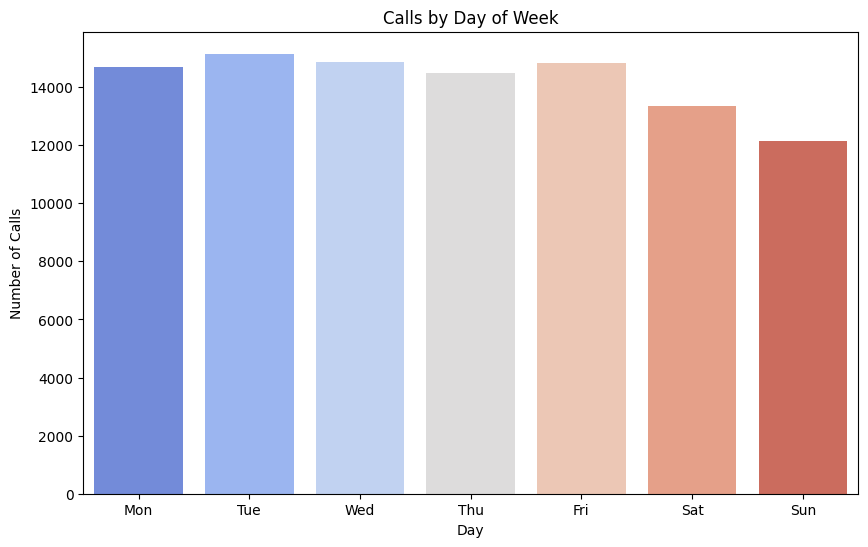

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(x='DayName', data=df, order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], palette='coolwarm')
plt.title('Calls by Day of Week')
plt.xlabel('Day')
plt.ylabel('Number of Calls')
plt.show()

<ipython-input-28-957c1b1350c2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month', data=df, palette='Set2')


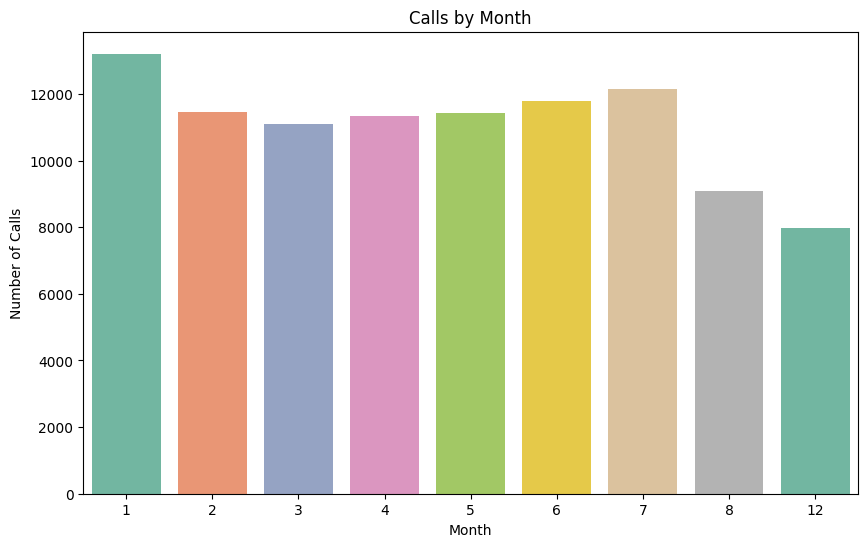

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=df, palette='Set2')
plt.title('Calls by Month')
plt.xlabel('Month')
plt.ylabel('Number of Calls')
plt.show()


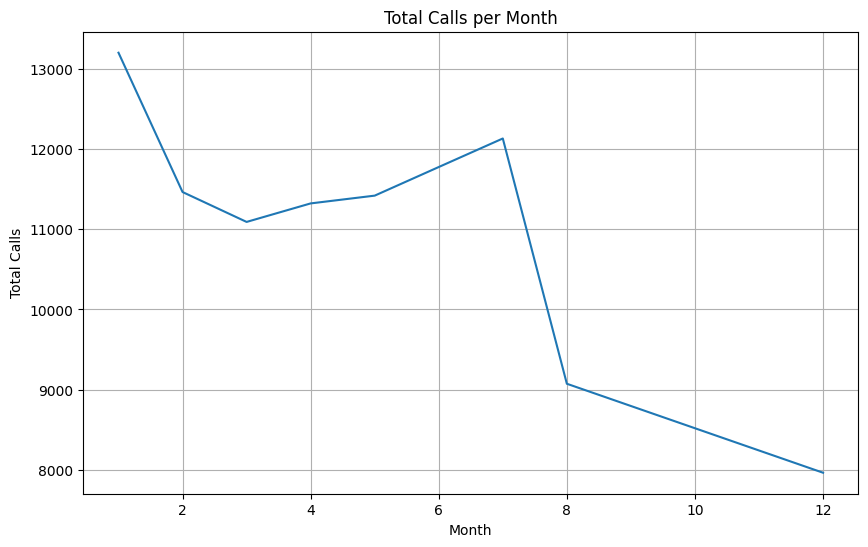

In [29]:
by_month = df.groupby(df['timeStamp'].dt.month).count()
plt.figure(figsize=(10, 6))
by_month['twp'].plot()
plt.title('Total Calls per Month')
plt.xlabel('Month')
plt.ylabel('Total Calls')
plt.grid(True)
plt.show()

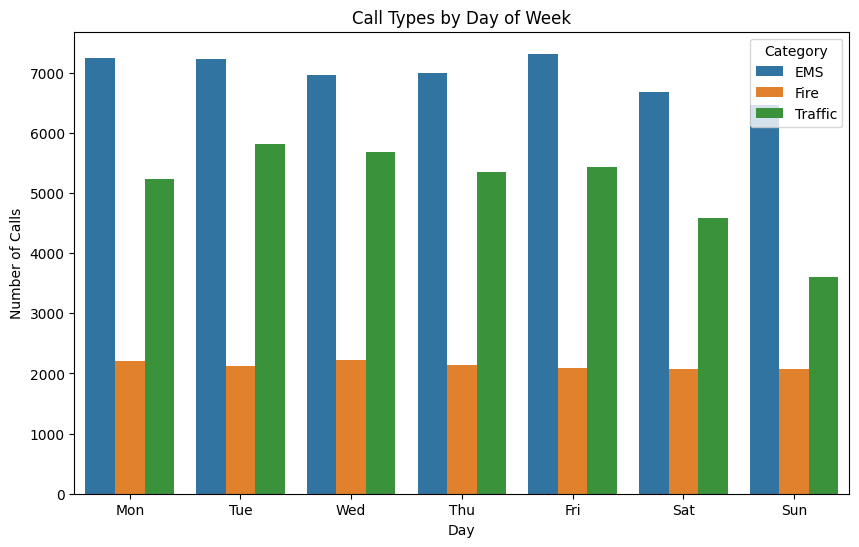

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(x='DayName', hue='Category', data=df, order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title('Call Types by Day of Week')
plt.xlabel('Day')
plt.ylabel('Number of Calls')
plt.legend(title='Category')
plt.show()

In [33]:
df[['lat', 'lng']].isnull().sum()

,0
lat,0
lng,0


In [35]:
map_911 = folium.Map(location=[df['lat'].mean(), df['lng'].mean()], zoom_start=10)

heat_data = [[row['lat'], row['lng']] for index, row in df.iterrows()]
HeatMap(heat_data[:10000]).add_to(map_911)

map_911

In [36]:
map_911.save("911_heatmap.html")

<Axes: title={'center': 'Top 10 Townships by Call Volume'}, ylabel='twp'>

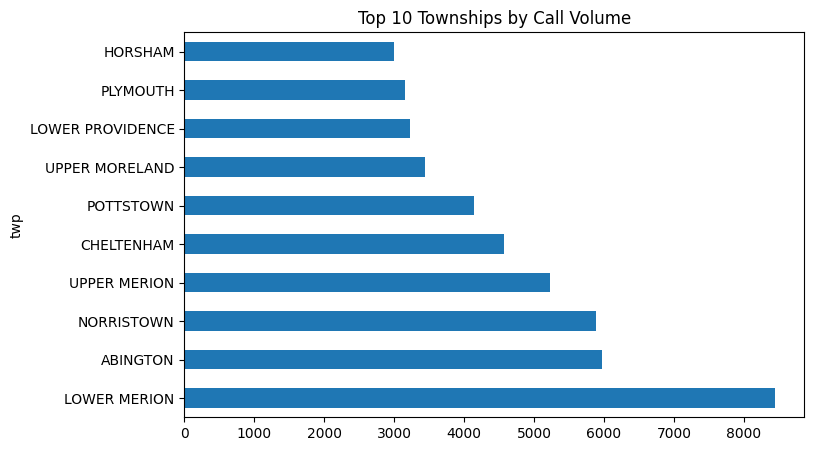

In [37]:
df['twp'].value_counts().head(10).plot(kind='barh', figsize=(8, 5), title='Top 10 Townships by Call Volume')

<Axes: title={'center': 'Top 10 Zip Codes by Call Volume'}, xlabel='zip'>

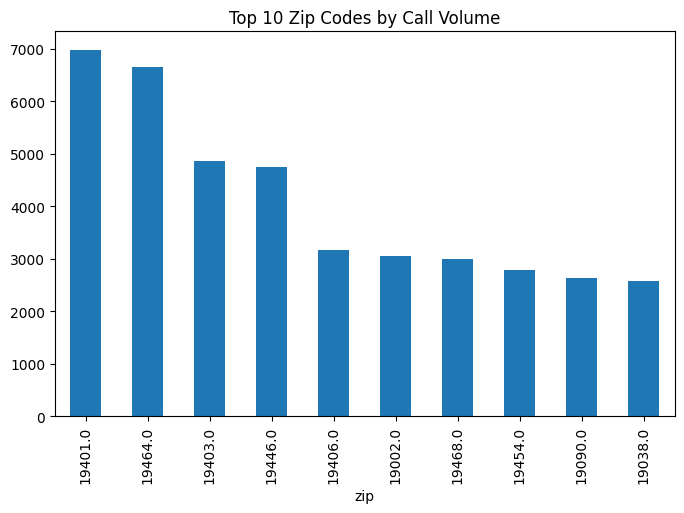

In [38]:
df['zip'].value_counts().head(10).plot(kind='bar', figsize=(8, 5), title='Top 10 Zip Codes by Call Volume')


<Axes: title={'center': 'Top 10 Specific Call Titles'}, ylabel='title'>

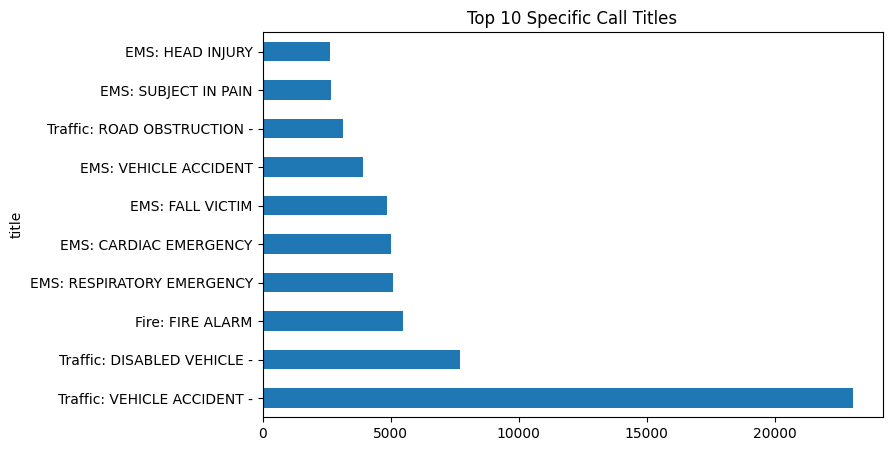

In [39]:
df['title'].value_counts().head(10).plot(kind='barh', figsize=(8, 5), title='Top 10 Specific Call Titles')


<ipython-input-40-3d91459c27bd>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('timeStamp').groupby('Category')['twp'].resample('M').count().unstack(0).plot(figsize=(12,6), title='Monthly Calls by Category')


<Axes: title={'center': 'Monthly Calls by Category'}, xlabel='timeStamp'>

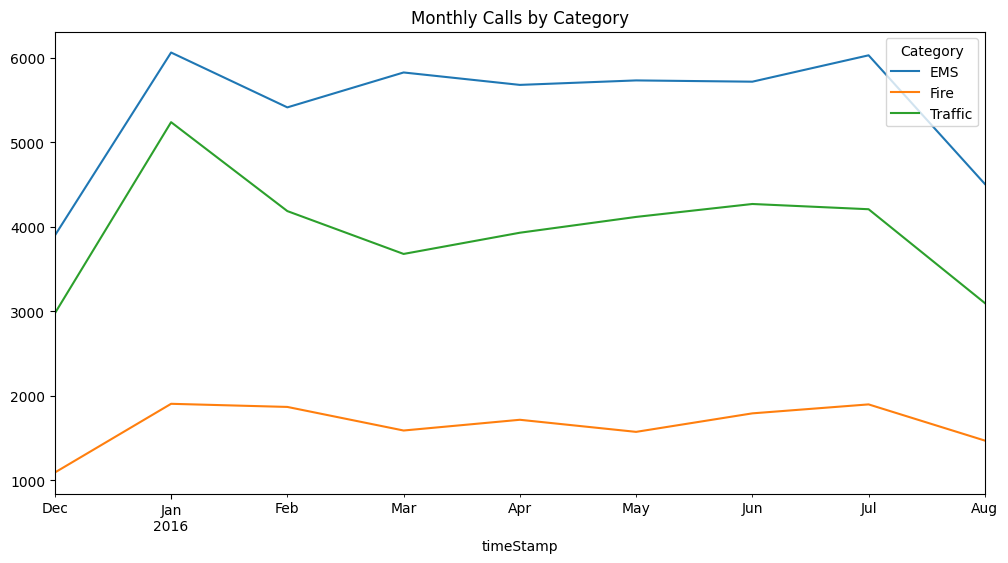

In [40]:
df.set_index('timeStamp').groupby('Category')['twp'].resample('M').count().unstack(0).plot(figsize=(12,6), title='Monthly Calls by Category')


<Axes: xlabel='Hour', ylabel='count'>

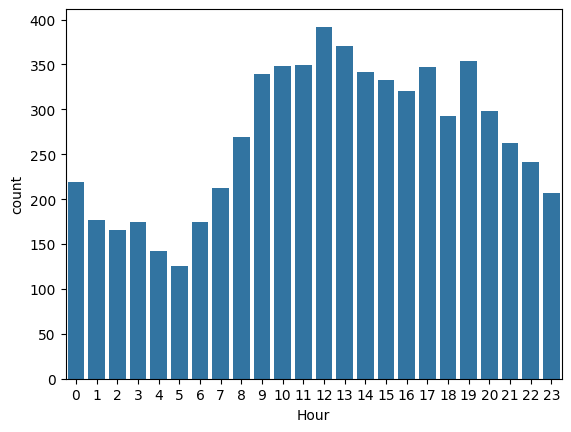

In [41]:
df_sun_ems = df[(df['DayName'] == 'Sun') & (df['Category'] == 'EMS')]
sns.countplot(x='Hour', data=df_sun_ems)


In [44]:
sample_df = df.dropna(subset=['lat', 'lng']).sample(1000, random_state=42)

map_cluster = folium.Map(location=[sample_df['lat'].mean(), sample_df['lng'].mean()], zoom_start=10)
marker_cluster = MarkerCluster().add_to(map_cluster)

for i, row in sample_df.iterrows():
    folium.Marker(location=[row['lat'], row['lng']],
                  popup=row['title']).add_to(marker_cluster)

map_cluster

In [51]:

df['Hour'] = df['timeStamp'].dt.hour
df['Month'] = df['timeStamp'].dt.month
df['DayOfWeek'] = df['timeStamp'].dt.dayofweek


location_groups = df.groupby(['lat', 'lng']).size().reset_index(name='call_count')


threshold = location_groups['call_count'].quantile(0.75)
location_groups['Risk'] = (location_groups['call_count'] > threshold).astype(int)


if 'Risk' in df.columns:
    df = df.drop(columns=['Risk'])

df = df.merge(location_groups[['lat', 'lng', 'Risk']], on=['lat', 'lng'], how='left')
df['Risk'] = df['Risk'].fillna(0).astype(int)

In [52]:
X = df[['lat', 'lng', 'Hour', 'Month', 'DayOfWeek']]
y = df['Risk']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42,  class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [59]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 4334  4021]
 [  734 20759]]
              precision    recall  f1-score   support

           0       0.86      0.52      0.65      8355
           1       0.84      0.97      0.90     21493

    accuracy                           0.84     29848
   macro avg       0.85      0.74      0.77     29848
weighted avg       0.84      0.84      0.83     29848



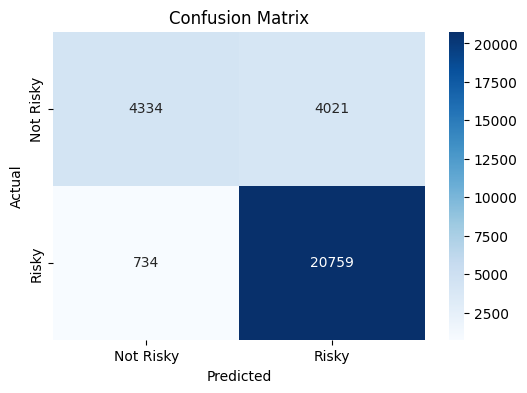

In [60]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Risky', 'Risky'], yticklabels=['Not Risky', 'Risky'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

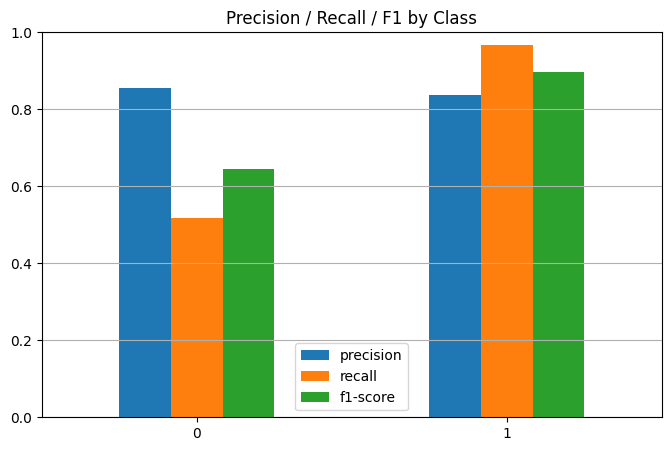

In [61]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose().iloc[:2]  # sadece class 0 ve 1

report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(8,5), ylim=(0,1))
plt.title('Precision / Recall / F1 by Class')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

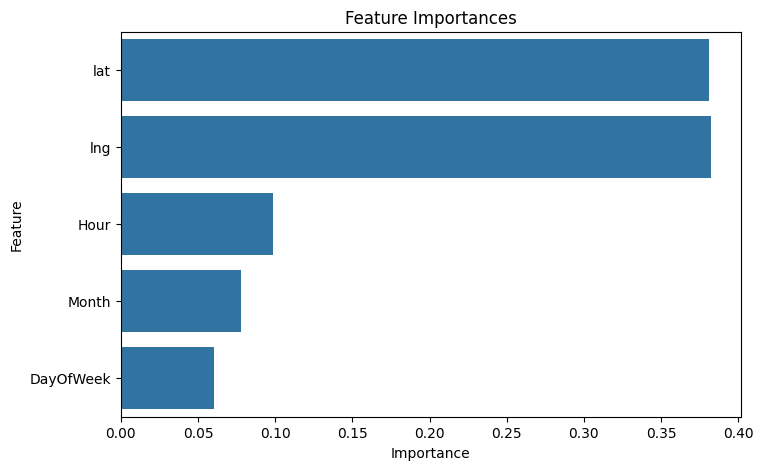

In [62]:
importances = model.feature_importances_
features = X.columns
plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=features)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()